<a href="https://colab.research.google.com/github/Chebt/Chebt/blob/main/LinearRegression_CaseStudy_LunarTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing Data



In [2]:
file_path = "/content/sample_data/housing.csv"

In [3]:
data = pd.read_csv(file_path)

In [4]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Missing Data Analysis

In [8]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [10]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


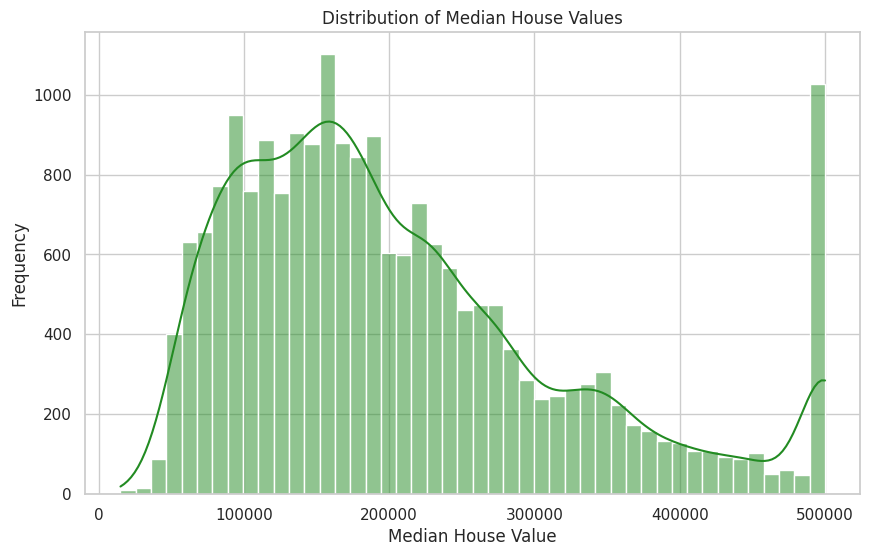

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

## Using InterQualtile Range to Remove Outliers

> Indented block



In [12]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= lower_bound) & (data_cleaned['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


## BoxPlot for Outlier Detection

### Outliers in Median Income


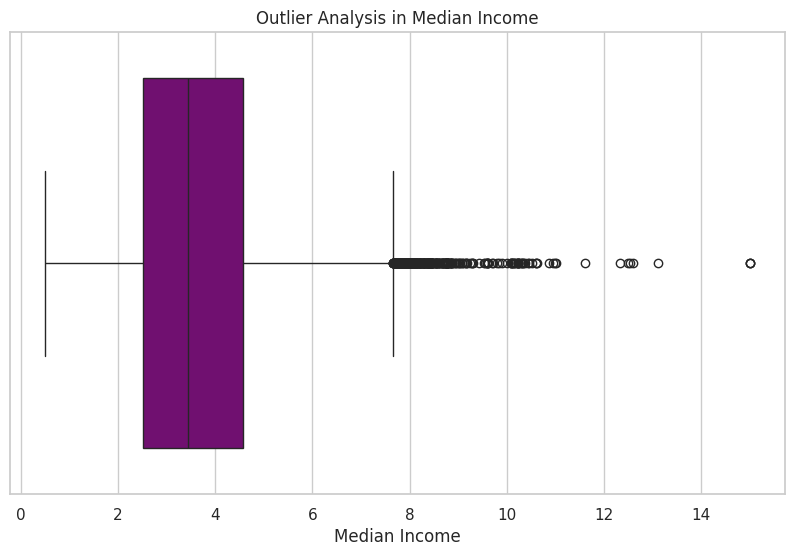

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income')
plt.xlabel('Median Income')
plt.show()

In [14]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [15]:
data = data_no_outliers_2

## Correlation HeatMap

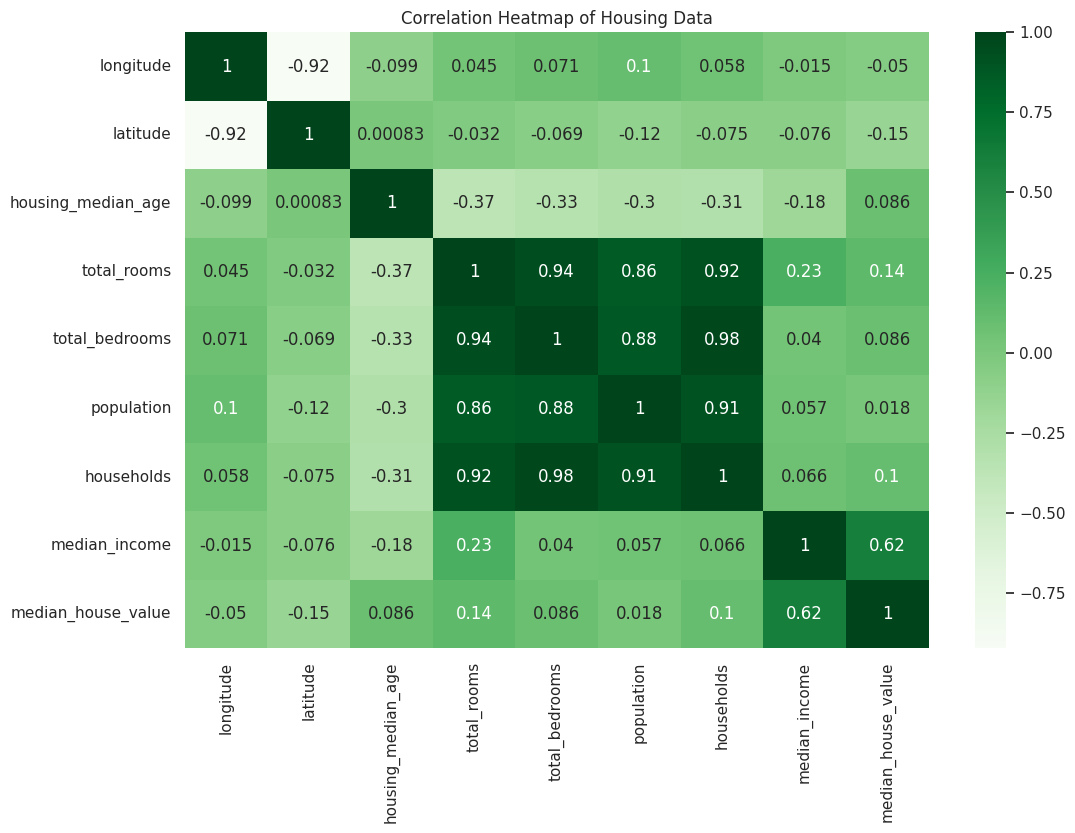

In [17]:
plt.figure(figsize=(12, 8))
# Calculate the correlation matrix for numerical columns only
numerical_data = data.select_dtypes(include=np.number)  # Select numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [18]:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [19]:
# Unique value count for categorical data
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variables

In [20]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies


,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
5,False,False,False,True,False
6,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [21]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,False,False,True,False
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,False,False,True,False
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,False,False,True,False
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,False,False,True,False
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,False,False,True,False
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,False,False,True,False
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,False,False,True,False
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,False,False,True,False


# Splitting the Data into Train/Test

In [24]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


## Training

In [25]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,True,False,False,False
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,False,True,False,False
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,True,False,False,False
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,False,True,False,False
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,True,False,False,False
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,False,True,False,False
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,False,True,False,False
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,False,True,False,False


In [26]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const


,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,True,False,False,False
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,False,True,False,False
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,True,False,False,False
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,False,True,False,False
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,True,False,False,False
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,False,True,False,False
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,False,True,False,False
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,False,True,False,False


In [28]:
# Fit the OLS model
# Convert y_train and X_train_const to numeric types if necessary
y_train = y_train.astype(float)  # Convert target to float
X_train_const = X_train_const.astype(float)  # Convert predictors to float

model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:45:54   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prediction/Testing

In [29]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
7322,153414.20188
465,239312.04418
12768,70054.781175
2617,189568.171319
13351,184267.795032
...,...
11691,171568.742378
1454,215893.783794
7360,129935.765388
19118,232846.312809


In [30]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,True,False,False,False
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,False,False,True,False
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,False,True,False,False
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,False,False,False,True
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,True,False,False,False
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,False,True,False,False
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,True,False,False,False
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,True,False,False,False


# Checking OLS Assumtions

## Assumtion 1: Linearity

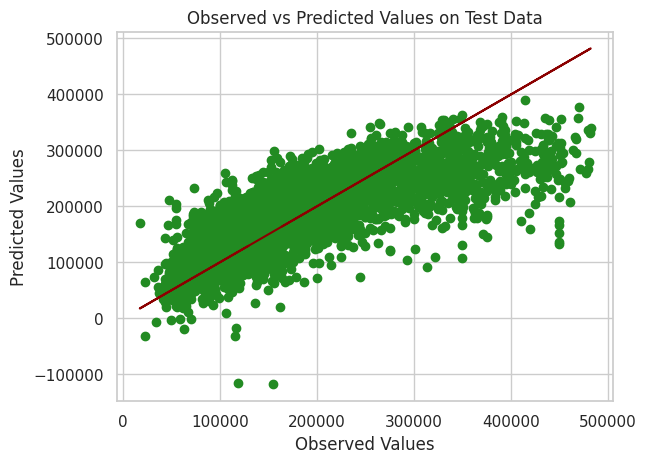

In [31]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()


**Positive Linear Relationship:**
The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

## Assumtion 2: Random Sample

In [32]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is 0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

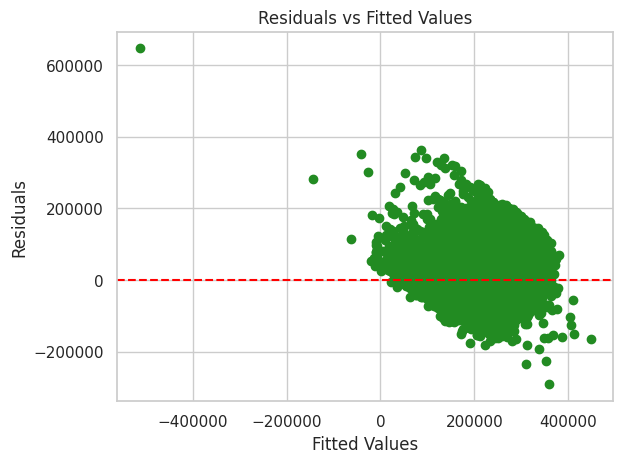

In [33]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

## Assumtion 3: Exogeneity

In [34]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')


Correlation between residuals and longitude: 0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


**Durbin-Wu-Hausman Test:**
For a more formal statistical test, use the **Durbin-Wu-Hausman** test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

## Assumtion 4: Homoskedasticty

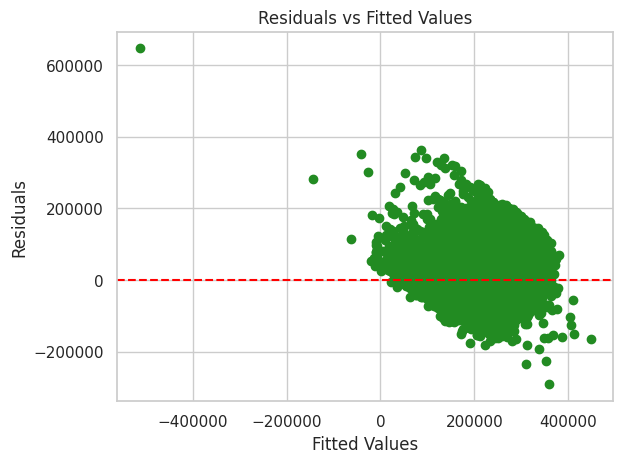

In [35]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Random Scatter:** If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

**Pattern or Shape:** If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

# Train/Test/Evaluation with Sklearn



## Scaling the Data

In [36]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.88869441674


In [38]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
